In [15]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
def loader_data(directed):
    
    # Load the explored values of n
    N = np.load('results/sizes.npy')
    print(N)
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    # reading from keys
    with open("results/keys.txt", "r") as f:
        keys = eval(f.read())
    
    # STATS
    stats = {}
    # reading dataframes
    for n in N:
        stats[n] = {}
        for key in keys:
            stats[n][key] = pd.read_csv("results/stats{}_{}_{}.csv".format(lab, n, str(key)))
        
    # DATA
    data = {}
    # reading dataframes
    for n in N:
        data[n] = {}
        for key in keys:
            data[n][key] = [pd.read_csv("results/data{}_{}_{}_metrics.csv".format(lab, n, str(key))),
                         pd.read_csv("results/data{}_{}_{}_levels.csv".format(lab, n, str(key)))]

    return stats, data

In [17]:
stats_dir, data_dir = loader_data(True)
stats_und, data_und = loader_data(False)

[1000]
[1000]


## Results

The graph will be disconnected for values < log(n)/n (sharp phase transition for P: G is connected)

For n = 10^3, this threshold is approximately 0.007

NB: this visualization in valid only for the preliminary results.


In [18]:
def plot_data(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('Metrics with p = {}'.format(k))
        data[k][0].boxplot(ax=axs[i,0])
        axs[i,1].set_title('Levels with p = {}'.format(k))
        data[k][1].boxplot(ax=axs[i,1])    

    plt.savefig('images/box_{}.jpeg'.format(lab))
    
    return

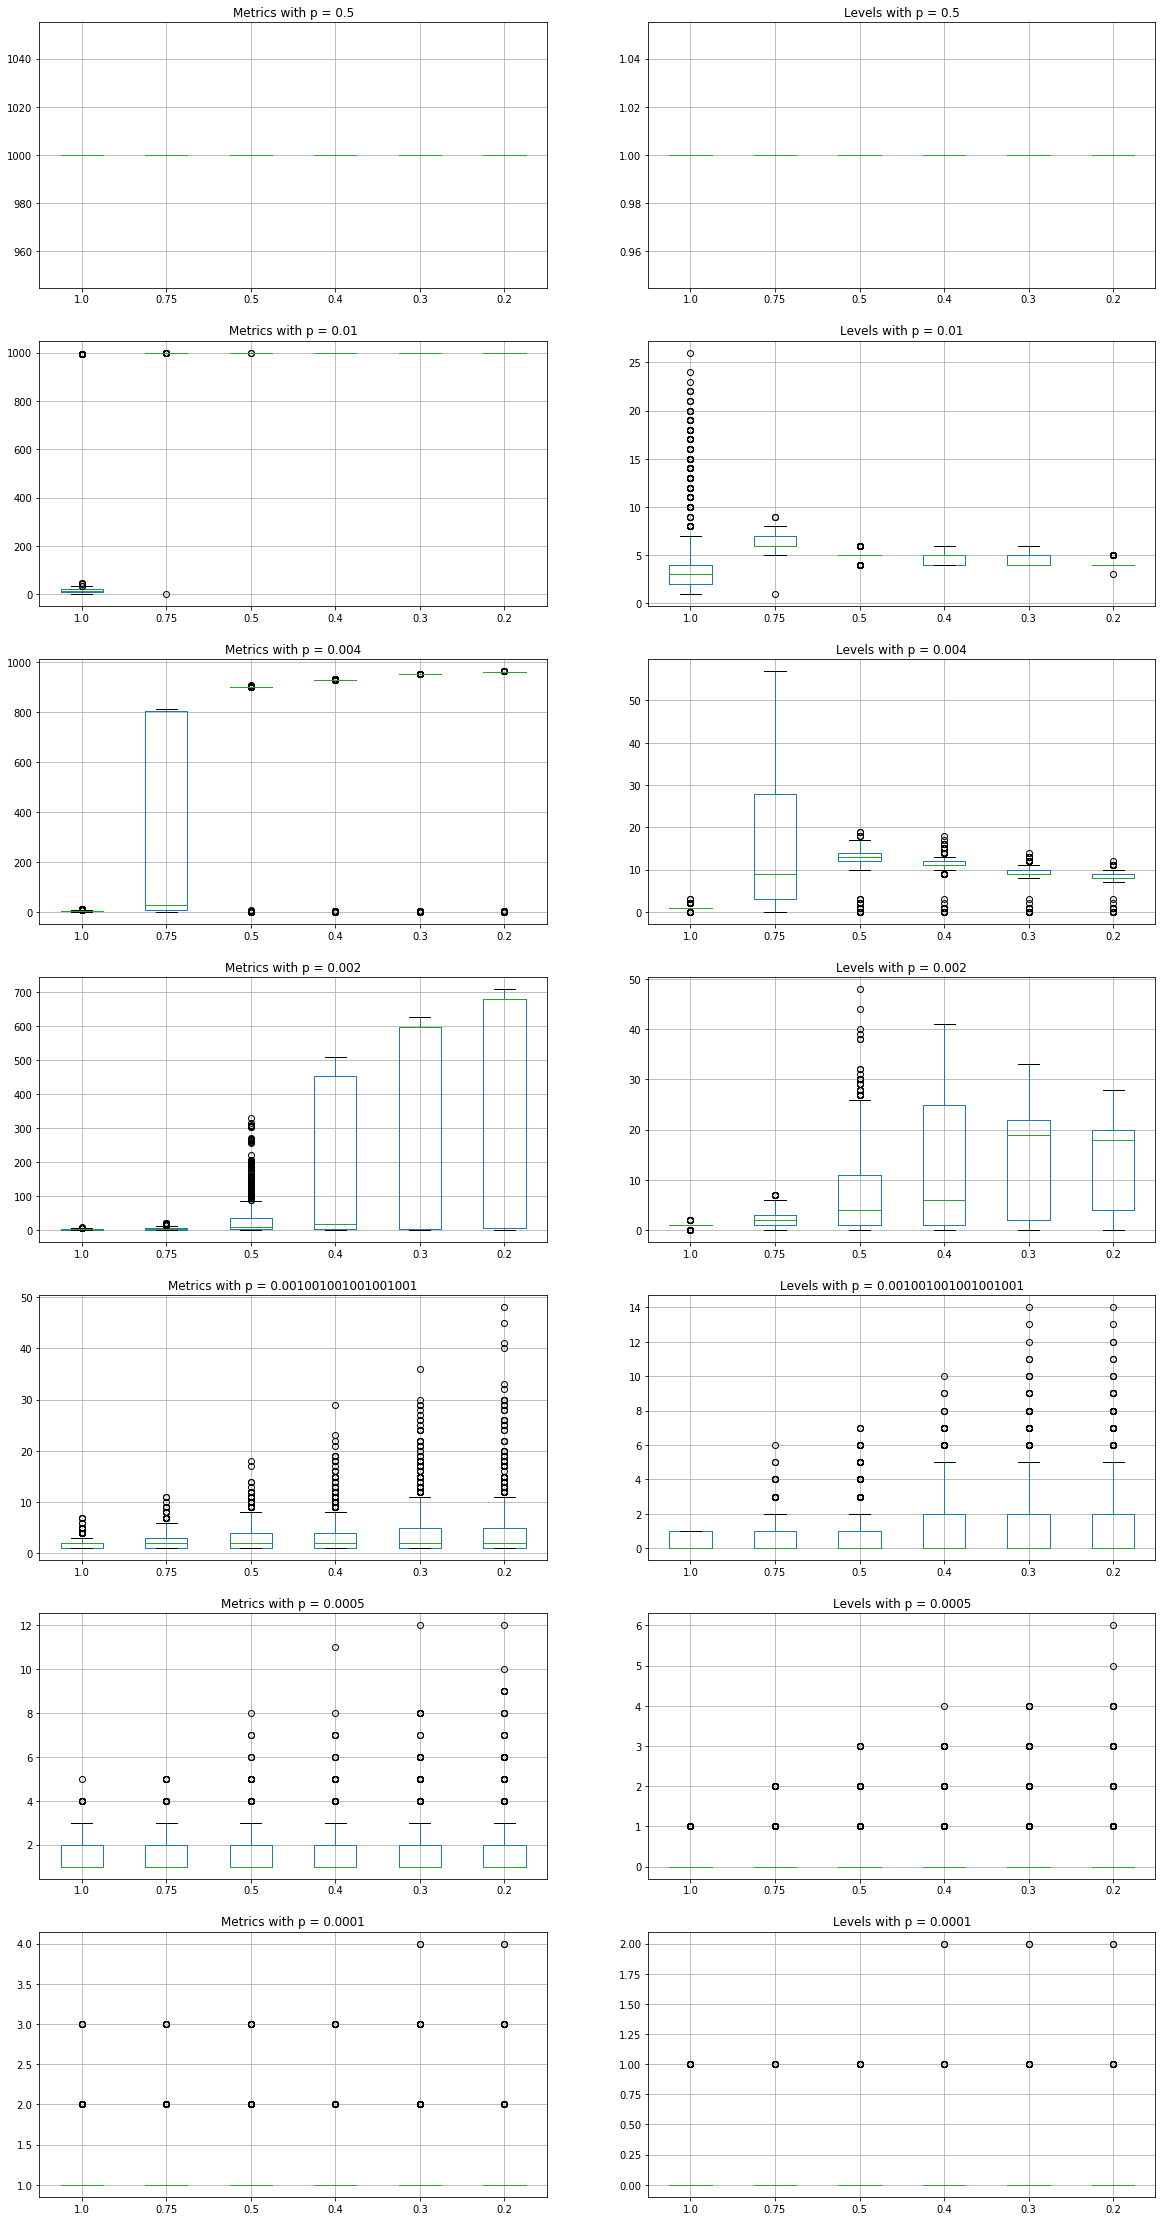

In [19]:
plot_data(True, data_dir[1000])

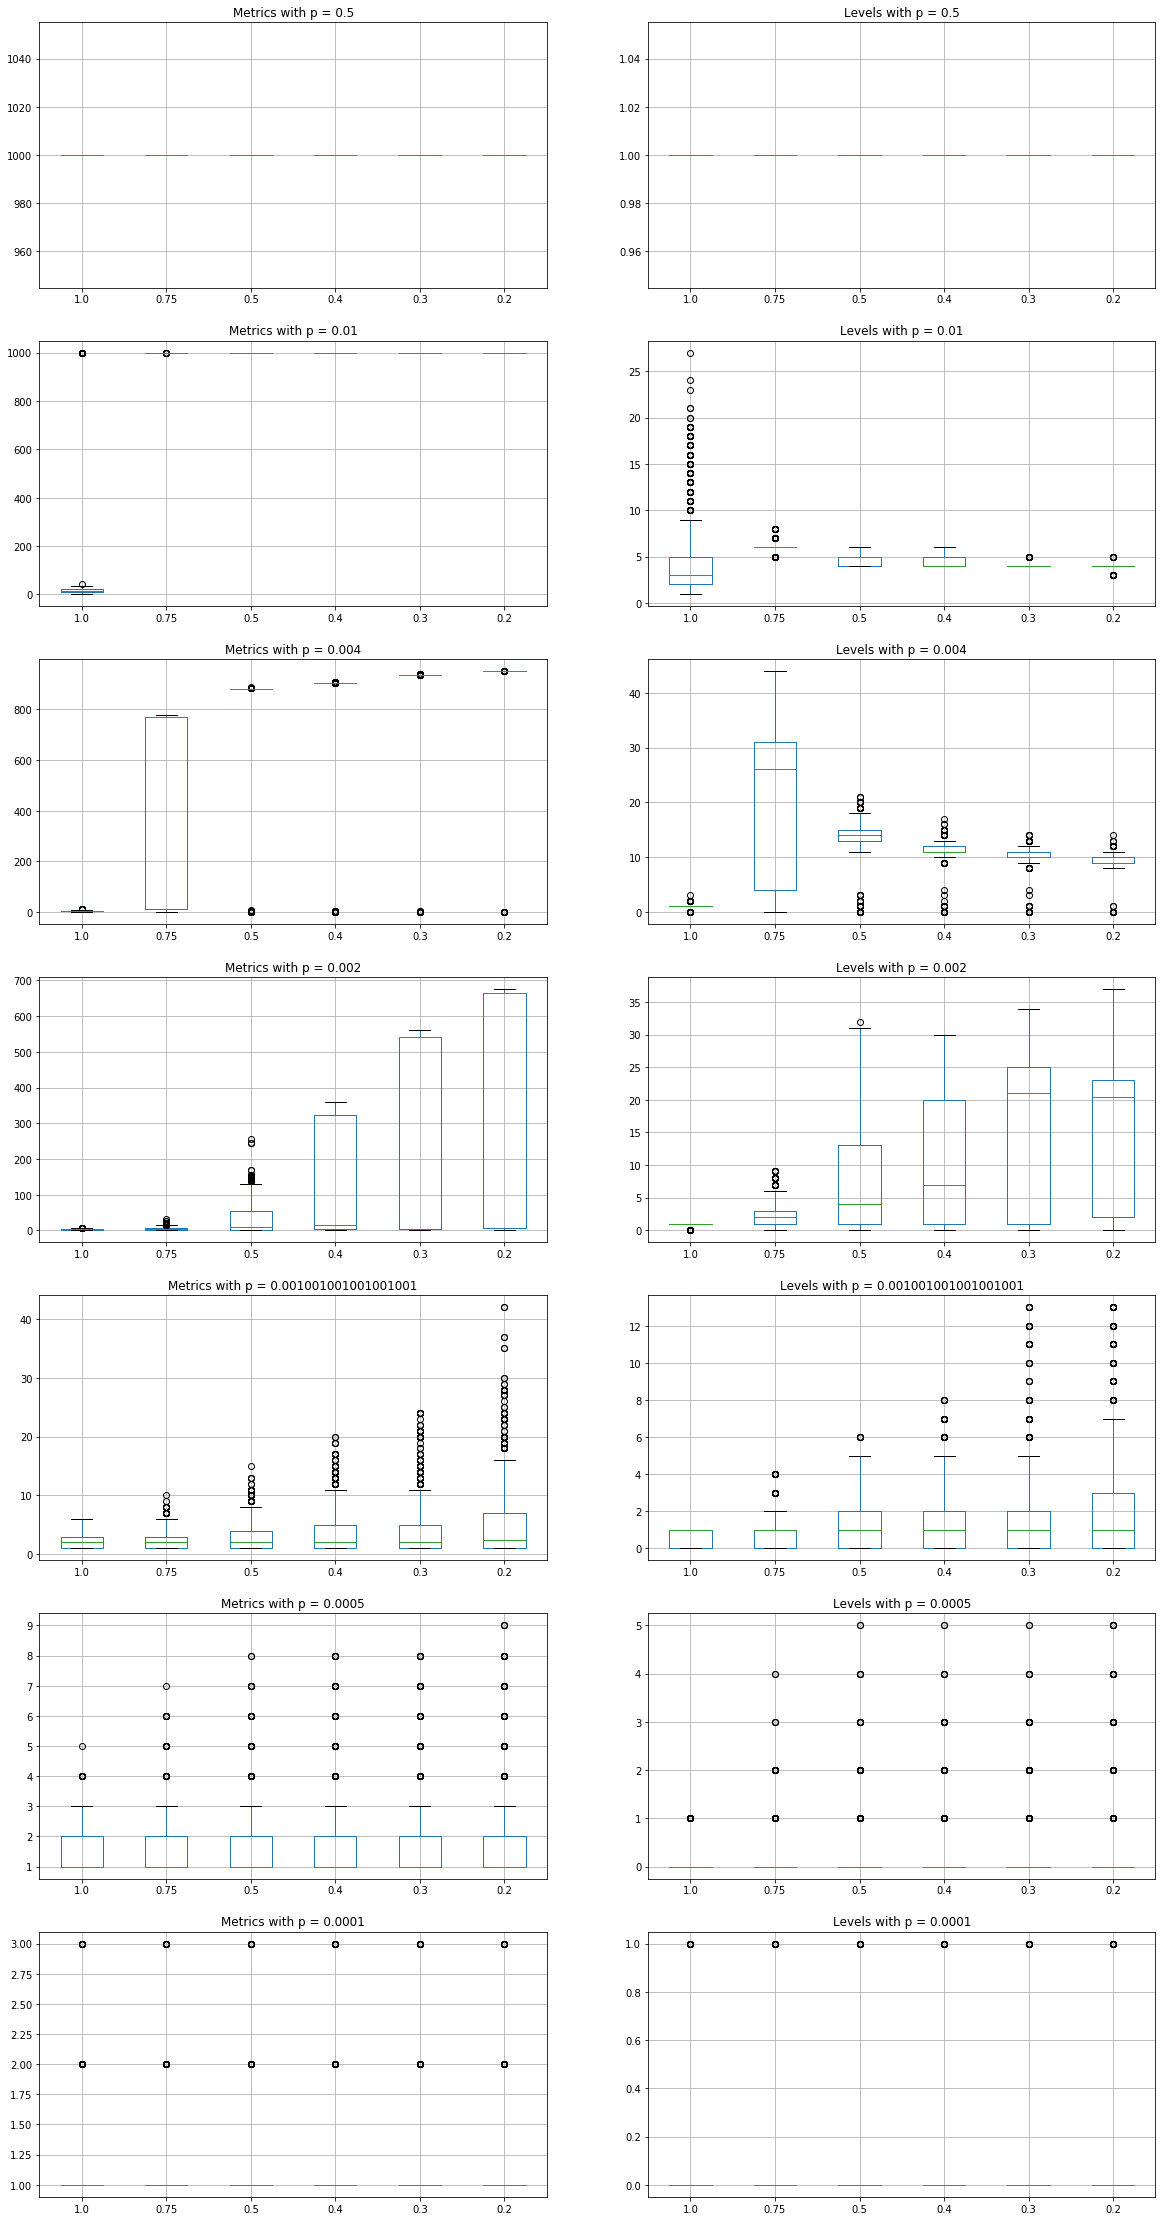

In [20]:
plot_data(False, data_und[1000])

In [21]:
def plot_stats(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('AVG Metrics with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_FLTR',ax=axs[i,0])
        axs[i,1].set_title('AVG Levels with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_exp_level',ax=axs[i,1])    

    plt.savefig('images/statsplot_{}.jpeg'.format(lab))

In [25]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir[1000].keys():
    print("Gnp with p = ", k)
    print(stats_dir[1000][k], end = "\n\n")

### DIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.40    1000.0            1.0
4  0.30    1000.0            1.0
5  0.20    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   129.621          4.328
1  0.75   996.014          6.425
2  0.50   999.002          5.013
3  0.40  1000.000          4.727
4  0.30  1000.000          4.376
5  0.20  1000.000          4.110

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     5.088          1.041
1  0.75   267.590         14.755
2  0.50   869.796         12.712
3  0.40   905.944         11.210
4  0.30   929.237          9.401
5  0.20   939.968          8.373

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     3.061          0.834
1  0.75     5.063          1.887
2  0.50    33.028          7.225
3  0.40   222.770         13.487
4  0.30   379.481         13.942
5  0.20   5

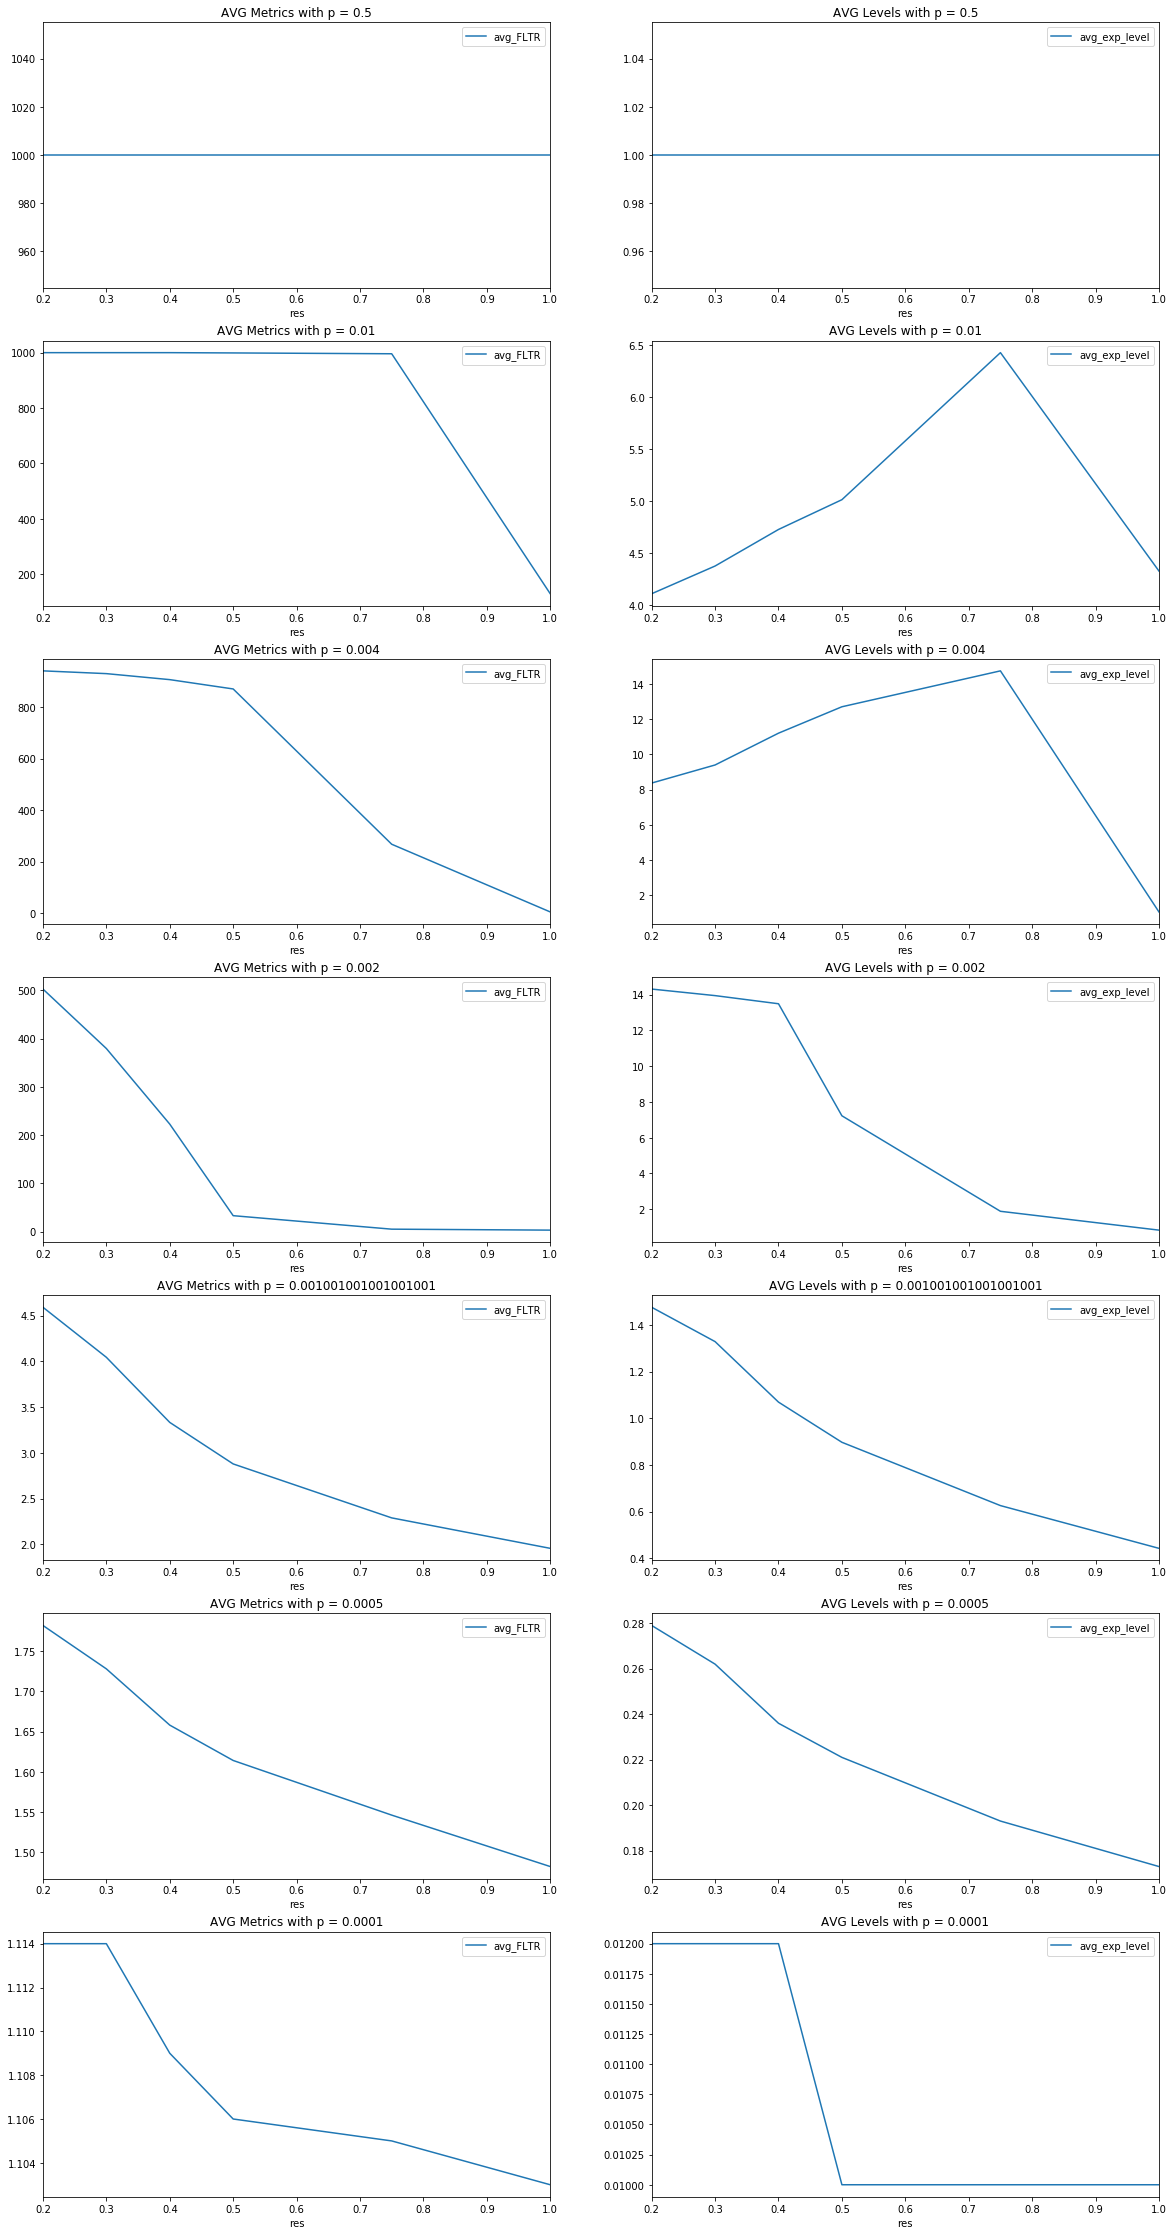

In [26]:
plot_stats(True, stats_dir[1000])

In [27]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und[1000].keys():
    print("Gnp with p = ", k)
    print(stats_und[1000][k], end = "\n\n")

### UNDIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.40    1000.0            1.0
4  0.30    1000.0            1.0
5  0.20    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   162.825          4.643
1  0.75   999.005          6.060
2  0.50  1000.000          4.720
3  0.40  1000.000          4.337
4  0.30  1000.000          4.023
5  0.20  1000.000          3.985

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     4.919          1.022
1  0.75   425.863         18.933
2  0.50   840.028         13.636
3  0.40   871.704         10.923
4  0.30   902.393          9.974
5  0.20   922.536          9.238

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.956          0.803
1  0.75     5.187          1.930
2  0.50    29.095          6.790
3  0.40   149.282         10.669
4  0.30   346.166         15.884
5  0.20  

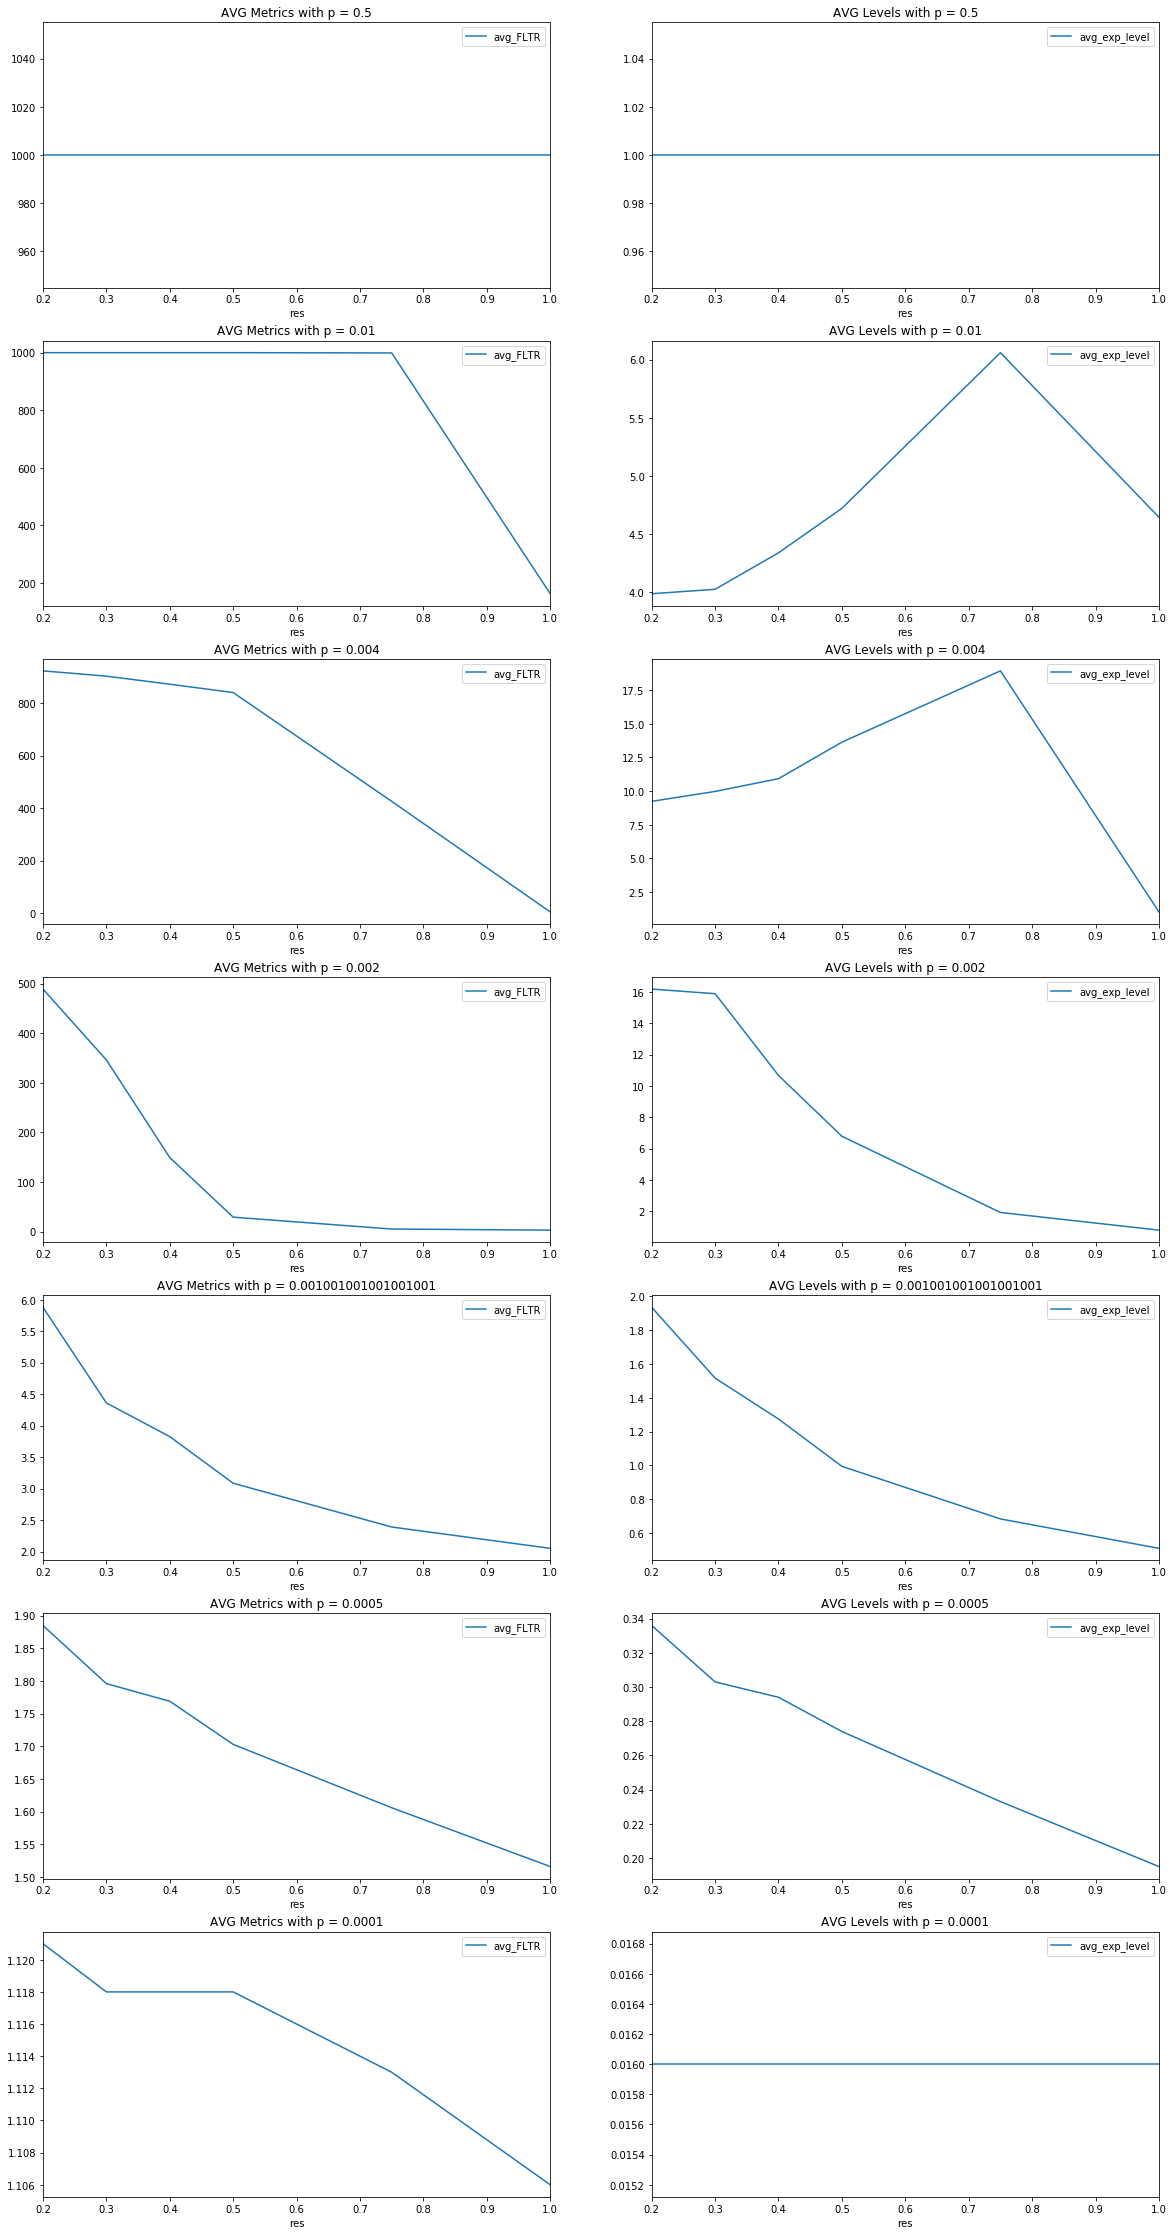

In [28]:
plot_stats(False, stats_und[1000])